In [1]:
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import epiweeks
import geopandas as gpd
import altair as alt
import shapely

In [2]:
df_macros = pd.read_csv('../macro_saude.csv')
df_macros['name_code_macro'] = df_macros['name_macro'].astype(str) + ' - ' + df_macros.code_macro.astype(str)

df_muni = gpd.read_file('../muni_br.gpkg')
df_muni = df_muni.merge(df_macros[['geocode', 'code_macro', 'name_code_macro','name_macro']], left_on='code_muni', right_on='geocode', how='left')

df_muni

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,code_muni,name_muni,code_state,abbrev_state,geometry,geocode,code_macro,name_code_macro,name_macro
0,1100015.0,Alta Floresta D'oeste,11,RO,"POLYGON ((-62.23224 -11.90804, -62.20670 -11.8...",1100015.0,1101.0,Cacoal - 1101,Cacoal
1,1100023.0,Ariquemes,11,RO,"POLYGON ((-63.57327 -9.78326, -63.57016 -9.773...",1100023.0,1102.0,Porto Velho - 1102,Porto Velho
2,1100031.0,Cabixi,11,RO,"POLYGON ((-60.71834 -13.39058, -60.70904 -13.3...",1100031.0,1101.0,Cacoal - 1101,Cacoal
3,1100049.0,Cacoal,11,RO,"POLYGON ((-61.27873 -11.50596, -61.28097 -11.5...",1100049.0,1101.0,Cacoal - 1101,Cacoal
4,1100056.0,Cerejeiras,11,RO,"POLYGON ((-61.41347 -13.23417, -61.42603 -13.2...",1100056.0,1101.0,Cacoal - 1101,Cacoal
...,...,...,...,...,...,...,...,...,...
5566,5222005.0,Vianópolis,52,GO,"MULTIPOLYGON (((-48.53842 -16.75003, -48.54051...",5222005.0,5210.0,Centro Sudeste - 5210,Centro Sudeste
5567,5222054.0,Vicentinópolis,52,GO,"MULTIPOLYGON (((-50.00189 -17.78179, -50.01420...",5222054.0,5210.0,Centro Sudeste - 5210,Centro Sudeste
5568,5222203.0,Vila Boa,52,GO,"MULTIPOLYGON (((-47.07742 -15.06330, -47.07851...",5222203.0,5207.0,Nordeste - 5207,Nordeste
5569,5222302.0,Vila Propício,52,GO,"MULTIPOLYGON (((-48.91463 -15.20939, -48.91532...",5222302.0,5209.0,Centro-Norte - 5209,Centro-Norte


In [3]:
geos = []
macros = []

for macro in df_muni.code_macro.unique(): 
    
    macros.append(macro)
    
    geos.append(shapely.ops.unary_union(df_muni.loc[df_muni.code_macro == macro].geometry.values))
    
    
    
    

In [4]:
df_new = pd.DataFrame()

df_new['code_macro'] = macros

df_new['geometry'] = geos

df_new = gpd.GeoDataFrame(df_new)

df_new.head()

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1784: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,code_macro,geometry
0,1101.0,"POLYGON ((-62.11971 -13.15353, -62.12429 -13.1..."
1,1102.0,"POLYGON ((-62.98157 -11.62905, -62.97462 -11.6..."
2,1201.0,"POLYGON ((-69.42562 -10.92824, -69.42598 -10.9..."
3,1302.0,"POLYGON ((-69.48189 -7.21666, -69.47903 -7.223..."
4,1304.0,"POLYGON ((-69.80135 -8.04128, -69.79179 -8.018..."


In [5]:
df_new = df_new.merge(df_muni[['name_code_macro', 'name_macro', 'code_macro']],
                     on ='code_macro')

df_new = df_new.drop_duplicates()

df_new.head()

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/array.py:125: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  aout[:] = out


,code_macro,geometry,name_code_macro,name_macro
0,1101.0,"POLYGON ((-62.11971 -13.15353, -62.12429 -13.1...",Cacoal - 1101,Cacoal
24,1102.0,"POLYGON ((-62.98157 -11.62905, -62.97462 -11.6...",Porto Velho - 1102,Porto Velho
52,1201.0,"POLYGON ((-69.42562 -10.92824, -69.42598 -10.9...",Acre - 1201,Acre
74,1302.0,"POLYGON ((-69.48189 -7.21666, -69.47903 -7.223...",Oeste - 1302,Oeste
95,1304.0,"POLYGON ((-69.80135 -8.04128, -69.79179 -8.018...",Central - 1304,Central


/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/plotting.py:33: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in geom:
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/pandas/core/dtypes/cast.py:1784: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  result[:] = values
/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/array.py:93: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometr

<Axes: >

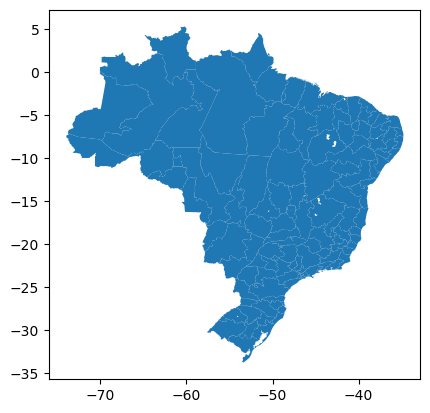

In [6]:
df_new.plot()

In [7]:
df_new.to_file('shapefile_macro.gpkg', driver='GPKG')

/opt/homebrew/Caskroom/miniforge/base/envs/alerta_dengue/lib/python3.9/site-packages/geopandas/io/file.py:174: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [6]:
import shapely

In [10]:
shapely.ops.unary_union()

TypeError: unary_union() missing 1 required positional argument: 'geoms'